# LEVEL 2 TASK 4

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Dataset  (1).csv')
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


## Identify if There Are Any Restaurant Chains Present in The Dataset

In [3]:
# Identify restaurant chains by counting occurences of restaurant names

restaurant_chains = df['Restaurant Name'].value_counts()

In [4]:
# Filter chains with multiple locations

restaurant_chains = restaurant_chains[restaurant_chains>1]

In [5]:
# Display the top 10 restaurant chains by number of locations

print("\nTop 10 Reataurant Chain by Number of Locations :")
print(restaurant_chains.head(10))


Top 10 Reataurant Chain by Number of Locations :
Restaurant Name
Cafe Coffee Day     83
Domino's Pizza      79
Subway              63
Green Chick Chop    51
McDonald's          48
Keventers           34
Pizza Hut           30
Giani               29
Baskin Robbins      28
Barbeque Nation     26
Name: count, dtype: int64


## Analyze The Ratings and Popularity of Different Restaurant Chains

In [6]:
# Find chain data

counts = df['Restaurant Name'].value_counts()
chains_list = counts[counts > 1].index

In [15]:
# Filter data to include only restaurant chains

chain_data = df[df['Restaurant Name'].isin(restaurant_chains.index)]


In [8]:
# Compare average ratings and total rates for each chain

chain_ratings = chain_data.groupby('Restaurant Name')['Aggregate rating'].mean()
chain_votes = chain_data.groupby('Restaurant Name')["Votes"].sum()

In [9]:
print("Chain Rates Calculated:")
print(chain_ratings.head())

Chain Rates Calculated:
Restaurant Name
10 Downing Street       4.000000
221 B Baker Street      3.366667
34 Parkstreet Lane      3.050000
34, Chowringhee Lane    2.791667
4700BC Popcorn          3.500000
Name: Aggregate rating, dtype: float64


In [10]:
# Combine ratings and votes into a single dataFrame

chain_analysis = pd.DataFrame ({"Average Rating": chain_ratings, "total Votes":chain_votes})

In [11]:
# Get the top 10 highest rated restaurant chains

top_rated_chains = chain_analysis.nlargest(10, "Average Rating")
print("\nTop 10 Highest Rated Restaurant Chains :")
print(top_rated_chains)


Top 10 Highest Rated Restaurant Chains :
                           Average Rating  total Votes
Restaurant Name                                       
Talaga Sampireun                    4.900         5514
AB's Absolute Barbecues             4.850         3151
Silantro Fil-Mex                    4.850         1364
AB's - Absolute Barbecues           4.825        13400
Naturals Ice Cream                  4.800         3094
Gymkhana                            4.700          328
The Cheesecake Factory              4.650         3010
Dishoom                             4.600         1269
Garota de Ipanema                   4.600           59
Chili's                             4.580         8156


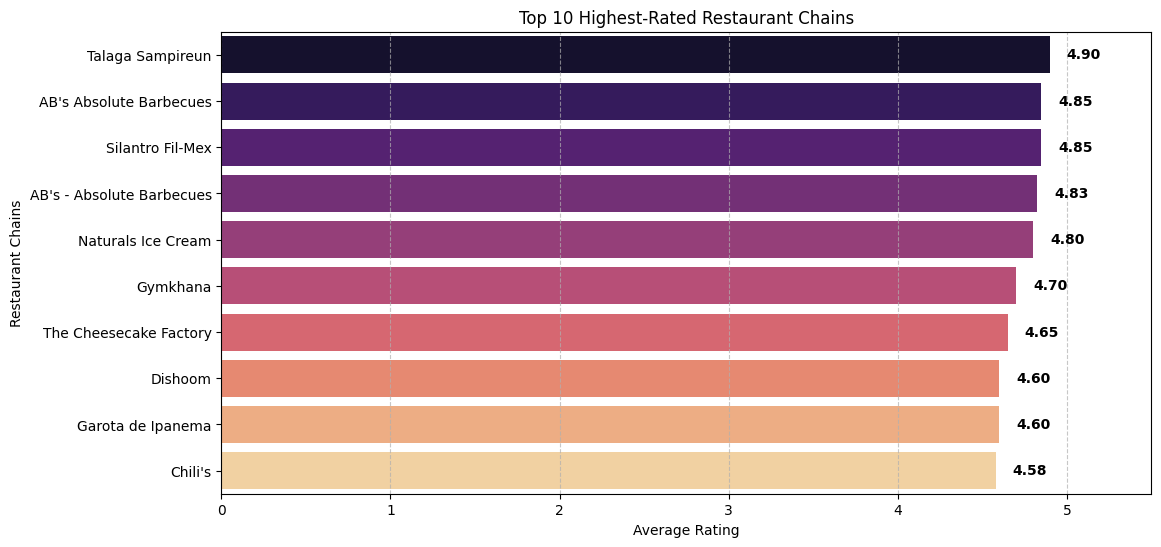

In [12]:
# Plot highest rated retaurant chains

plt.figure(figsize=(12, 6))
sns.barplot(x=top_rated_chains["Average Rating"], y=top_rated_chains.index, hue=top_rated_chains.index, palette='magma', legend=False)
plt.title('Top 10 Highest-Rated Restaurant Chains')
plt.xlabel('Average Rating')
plt.ylabel('Restaurant Chains')
plt.xlim(0,5.5)
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Display values on bars

for index, value in enumerate(top_rated_chains["Average Rating"]):
    plt.text(value + 0.1, index, f"{value:.2f}", va="center", fontsize=10,fontweight='bold')
    
plt.show()

In [13]:
# Get the top 10 most popular chains based on total votes

top_popular_chains = chain_analysis.nlargest(10, "total Votes")
print("\nTop 10 Most Popular Restaurant Chains by Total Votes :")
print(top_popular_chains)


Top 10 Most Popular Restaurant Chains by Total Votes :
                           Average Rating  total Votes
Restaurant Name                                       
Barbeque Nation                  4.353846        28142
AB's - Absolute Barbecues        4.825000        13400
Big Chill                        4.475000        10853
Farzi Cafe                       4.366667        10098
Truffles                         3.950000         9682
Chili's                          4.580000         8156
Joey's Pizza                     4.250000         7807
Big Yellow Door                  4.266667         7511
Saravana Bhavan                  4.133333         7238
Starbucks                        3.805556         7139


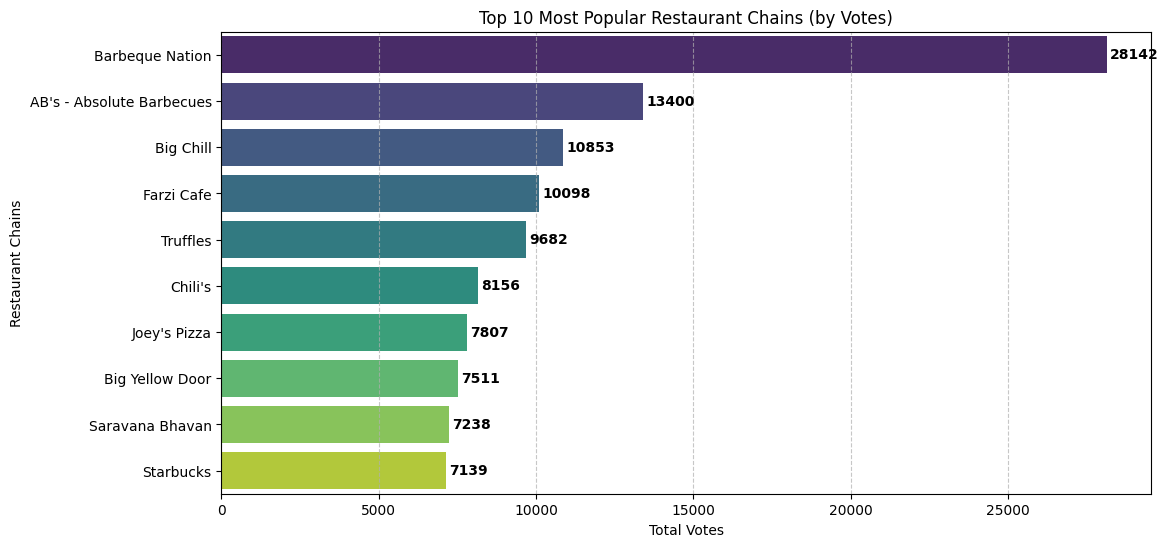

In [14]:
# Plot most popular restaurant chains (by votes)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_popular_chains["total Votes"], y=top_popular_chains.index, hue=top_popular_chains.index, palette='viridis', legend=False)
plt.title('Top 10 Most Popular Restaurant Chains (by Votes)')
plt.xlabel('Total Votes')
plt.ylabel('Restaurant Chains')
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Display values on bars

for index, value in enumerate(top_popular_chains["total Votes"]):
    plt.text(value + 100, index, f"{int(value)}", va="center", fontsize=10, fontweight='bold')

plt.show()